In [106]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from hdf5manager import hdf5manager as h5
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage
import scipy
from skimage.measure import label, regionprops
from scipy.ndimage.filters import gaussian_filter, convolve
from skimage.morphology import disk, watershed
from skimage.morphology import erosion, dilation, opening, closing
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
from scipy.ndimage.filters import maximum_filter
from opticFlow import opticFlow as of
import colorsys
import wholeBrain as wb
import cv2

In [107]:
path = '/Users/emmadionne/Downloads/test_angs_mags.hdf5'

h = h5(path)
h.keys()
print(dir(h))
print(h.keys())
mov = h.load('mags')
angs = h.load('rot_angs')
start_stop = h.load('start_stop_index')

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'close', 'keys', 'load', 'open', 'path', 'print', 'save', 'verbose']
['start_stop_index', 'mags', 'rot_angs']


['dfof_mean']

/Users/emmadionne/Downloads/test_angs_mags.hdf5 has the following keys:
	- dfof
	- mags
	- rot_angs
/Users/emmadionne/Downloads/test_angs_mags.hdf5 has the following attributes:
	- start_stop_index



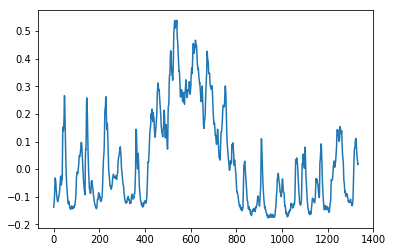

In [130]:
path2 = '/Users/emmadionne/Documents/pyWholeBrain/brain_data.hdf5'
h2 = h5(path2)
h2.keys()
print(h2.keys())
dfof = h2.load("dfof_mean")
h.save({"dfof" : dfof})
plt.plot(dfof)

In [108]:
print(mov.shape)

(4000, 105, 141)


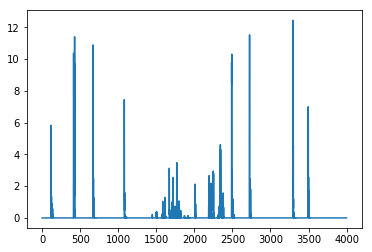

In [140]:
mean = np.nanmean(mov, axis = (1, 2))
plt.plot(mean)

(4000, 105, 141)


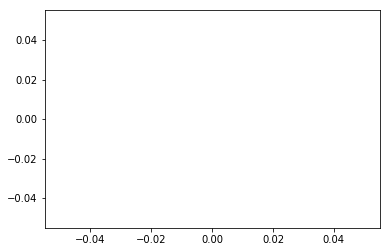

In [174]:
angs = h.load('rot_angs')
print(angs.shape)
angle = np.mean(angs, axis = (1, 2))
plt.plot(angle)

[0. 0. 0. ... 0. 0. 0.]
1.1585295006939789
[0. 0. 0. ... 0. 0. 0.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(4000,)
(4000,)


TypeError: 'AxesSubplot' object is not subscriptable

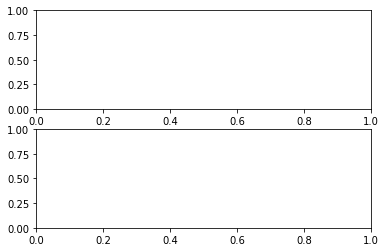

In [170]:
mean2 = np.mean(mov, axis = (1, 2))
print(mean)
print(mean[431])
print(mean2)
print(type(mean))
print(type(mean2))
print(mean.shape)
print(mean2.shape)
figure, a = plt.subplots(2)
a[0][0].imshow(mean, aspect = "auto")
a[1][0].imshow(mean2, aspect = "auto")
plt.show()

In [110]:
wb.playMovie(mov)


Playing Movie
-----------------------
preprocessing data...
Pre-processing movie rescaling...

Rescaling Movie
-----------------------
mean: 0.09717086151820375 low: 3 high: 7 std: 2.3813770774755803
newMin: -7.046960370908537
newMax 16.766810403847266
amin 0.0
amax 407.083147251264
newSlope: 15.20861713456773


Movie range normalization: 2.1907074189984996
starting video playback..




(-0.5, 140.5, 104.5, -0.5)

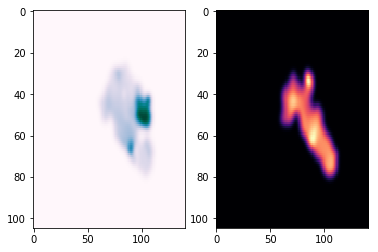

In [160]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(mov[431], aspect = "auto", cmap = "PuBuGn")
axs[0].axis("on")
axs[1].imshow(mov[434], aspect = "auto", cmap = "magma")
axs[1].axis("on")
#plt.colorbar()

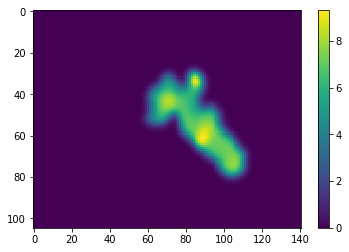

With nan: [0. 0. 0. ... 0. 0. 0.]
Without nan: 2.4145905077650074


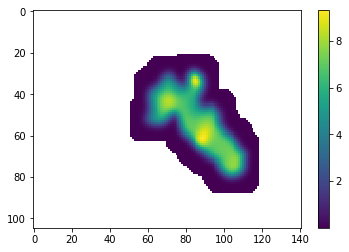

In [112]:
plt.imshow(mov[434], aspect = "auto")
plt.colorbar()
plt.show()


mov2 = mov[434].copy()
mov2[mov2==0]=np.nan
mean2 = np.nanmean(mov2)
print("With nan: " + str(mean))
print("Without nan: " + str(mean2))
mov[np.isnan(mov)] = 0
mean = np.mean(mov[434])

plt.imshow(mov2, aspect = "auto")
plt.colorbar()
plt.show()

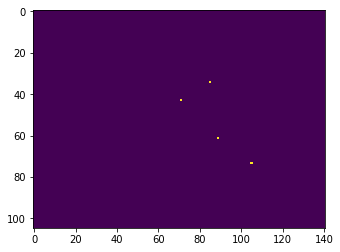

In [113]:
def localMaxima2d(array_2d):
    # finds local maxima of a given 2d array
    neighborhood = np.ones((5,5))
    local_max = maximum_filter(array_2d, footprint=neighborhood)==array_2d
    background = (array_2d==0)
    eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)
    lmax = local_max ^ eroded_background
    return lmax
plt.imshow(localMaxima2d(mov[434]))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5393333146154218,
 1.8812315421988537,
 5.831614083963566,
 2.655092081754685,
 2.222759005750446,
 1.1911884787114078,
 0.17343143010936612,
 0.540215484357613,
 1.3583825188043837,
 1.2445611879657308,
 0.29628813980963137,
 0.9205346520709573,
 0.020982393144313168,
 0.00616923286801293,
 0.855312649908198,
 

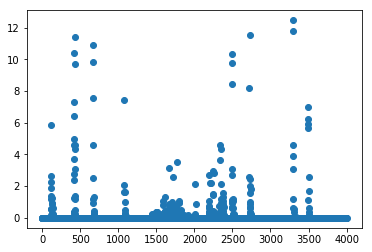

In [114]:
#finds the means, including the 0's, in the frame and puts it in a list
def findMeans(array_3d):
    all_means = []
    x = []
    for i, frame in enumerate(array_3d):
        all_means.append(np.mean(frame))
        x.append(i)
    
    plt.scatter(x, all_means)
    return all_means
    
findMeans(mov)
        
        

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.4397693574518797,
 6.507647421026223,
 18.52093292975131,
 9.241054781597828,
 6.459278337419307,
 3.699959159874099,
 0.9670524393192281,
 1.93793971887465,
 6.391794914013734,
 4.596814332101958,
 1.1717480158237499,
 3.7313736634695838,
 0.22174517663514673,
 0.09379365356639636,
 3.477197669826565,
 0.0,
 0.

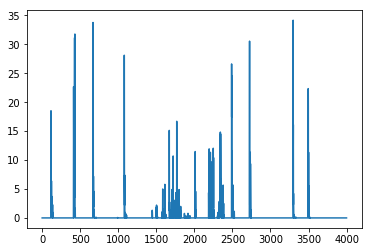

In [131]:
#includes 0s with the standard deviation
def standardDeviation(array_3d):
    all_deviations = []
    x = []
    for i, frame in enumerate(array_3d):
        mean = np.mean(frame)
        x.append(i)
        
        deviations = []
        for r in frame:
            for c in range(len(r)):
                deviations.append((r[c] - mean) ** 2)
        mean1 = np.mean(deviations)
        current_deviation = mean1 ** (1/2)
        all_deviations.append(current_deviation)

    plt.plot(x, all_deviations)
    
    return all_deviations

standardDeviation(mov)
        
        
    

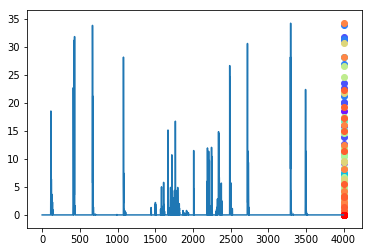

In [134]:
deviations = standardDeviation(mov)
x = len(deviations)
ys = deviations

colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for y, c in zip(ys, colors):
    plt.scatter(x, y, color=c)